In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [6]:
df= pd.read_csv("/content/sample_data/Airbnb_Data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0


In [7]:
df.columns    #column names

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [74]:
#checking for missing value
print (df.isnull().sum())

id                         0
log_price                  0
property_type              0
room_type                  0
amenities                  0
accommodates               0
bathrooms                146
bed_type                   0
cleaning_fee               0
city                       0
description                0
first_review               0
host_since               126
instant_bookable           0
last_review                0
latitude                   0
longitude                  0
name                       0
neighbourhood           4588
number_of_reviews          0
review_scores_rating       0
zipcode                  636
bedrooms                  62
beds                      91
price                      0
dtype: int64


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49790 entries, 0 to 49789
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      49790 non-null  int64  
 1   log_price               49790 non-null  float64
 2   property_type           49790 non-null  object 
 3   room_type               49790 non-null  object 
 4   amenities               49790 non-null  object 
 5   accommodates            49790 non-null  int64  
 6   bathrooms               49644 non-null  float64
 7   bed_type                49790 non-null  object 
 8   cancellation_policy     49790 non-null  object 
 9   cleaning_fee            49790 non-null  bool   
 10  city                    49790 non-null  object 
 11  description             49790 non-null  object 
 12  first_review            39126 non-null  object 
 13  host_has_profile_pic    49663 non-null  object 
 14  host_identity_verified  49663 non-null

In [10]:
#handling missing value

In [11]:
df['last_review']= pd.to_datetime(df['last_review'],errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49789 entries, 0 to 49788
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    49789 non-null  int64         
 1   log_price             49789 non-null  float64       
 2   property_type         49789 non-null  object        
 3   room_type             49789 non-null  object        
 4   amenities             49789 non-null  object        
 5   accommodates          49789 non-null  int64         
 6   bathrooms             49643 non-null  float64       
 7   bed_type              49789 non-null  object        
 8   cleaning_fee          49789 non-null  bool          
 9   city                  49789 non-null  object        
 10  description           49789 non-null  object        
 11  first_review          49789 non-null  datetime64[ns]
 12  host_since            49663 non-null  object        
 13  instant_bookable     

In [13]:
df['first_review']= pd.to_datetime(df['first_review'],errors='coerce')              # Count missing values

In [16]:
df.fillna({"review_scores_rating":0, 'last_review': df['last_review'].min(), 'first_review': df['first_review'].min()}, inplace= True)

In [19]:
df.dropna(subset=['name'], inplace=True)

In [37]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   146
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_identity_verified      126
host_response_rate        12281
host_since                  126
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood              4588
number_of_reviews             0
review_scores_rating          0
thumbnail_url              5571
zipcode                     636
bedrooms                     62
beds                         91
dtype: int64


In [42]:
df= df.drop(columns=["thumbnail_url", "host_response_rate","host_identity_verified" ,"host_has_profile_pic","cancellation_policy"], errors= 'ignore')

In [43]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds'],
      dtype='object')

In [44]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,True,SF,...,2009-01-21,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,0.0,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,20009,0.0,1.0


In [46]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49789 entries, 0 to 49788
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    49789 non-null  int64         
 1   log_price             49789 non-null  float64       
 2   property_type         49789 non-null  object        
 3   room_type             49789 non-null  object        
 4   amenities             49789 non-null  object        
 5   accommodates          49789 non-null  int64         
 6   bathrooms             49643 non-null  float64       
 7   bed_type              49789 non-null  object        
 8   cleaning_fee          49789 non-null  bool          
 9   city                  49789 non-null  object        
 10  description           49789 non-null  object        
 11  first_review          49789 non-null  datetime64[ns]
 12  host_since            49663 non-null  object        
 13  instant_bookable     

In [87]:
df.to_csv('Airbnb_Data.csv', index=False)

In [58]:
#descriptive statistics
df.describe()

,id,log_price,accommodates,bathrooms,first_review,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,4.978900e+04,49789.000000,49789.000000,49643.00000,49789,49789,49789.000000,49789.000000,49789.000000,49789.000000,49727.000000,49698.000000
mean,1.126010e+07,4.781654,3.158268,1.23529,2014-07-03 08:30:04.157544960,2015-06-18 05:35:33.218180608,38.440945,-92.443040,21.014722,72.804495,1.267219,1.712866
min,3.440000e+02,0.000000,1.000000,0.00000,2008-11-17 00:00:00,2009-01-21 00:00:00,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.245923e+06,4.317488,2.000000,1.00000,2013-01-23 00:00:00,2015-10-19 00:00:00,34.125459,-118.343117,1.000000,80.000000,1.000000,1.000000
50%,1.225380e+07,4.709530,2.000000,1.00000,2015-11-28 00:00:00,2017-04-09 00:00:00,40.662212,-76.997592,6.000000,94.000000,1.000000,1.000000
75%,1.641307e+07,5.220356,4.000000,1.00000,2016-10-26 00:00:00,2017-08-20 00:00:00,40.745999,-73.954595,24.000000,99.000000,1.000000,2.000000
max,2.122836e+07,7.600402,16.000000,8.00000,2017-10-05 00:00:00,2017-10-05 00:00:00,42.390437,-70.985047,605.000000,100.000000,10.000000,16.000000
std,6.087070e+06,0.717553,2.166583,0.58258,NaN,NaN,3.082377,21.719449,38.146272,39.940844,0.854085,1.260907


In [64]:
df['price'] = np.exp(df['log_price'])
print (df['price'])
df.head()

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
49784     40.0
49785     80.0
49786     75.0
49787     80.0
49788    155.0
Name: price, Length: 49789, dtype: float64


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,10027,1.0,3.0,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,0.0,94117.0,2.0,2.0,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,20009,0.0,1.0,115.0


In [50]:
#visualization


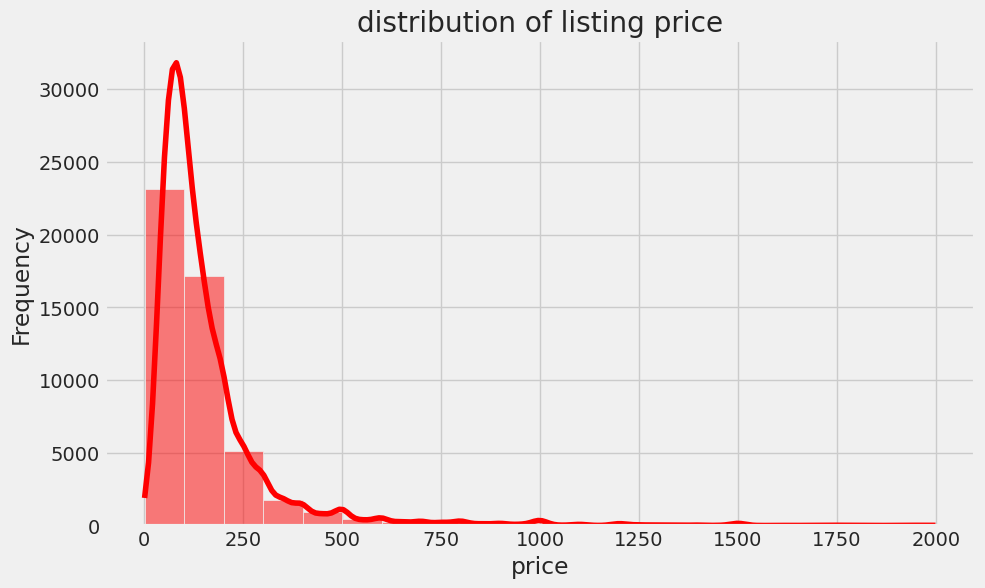

In [65]:
#1.What is the distribution of listing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='red')
plt.title("distribution of listing price")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

The distribution is right-skewed (positively skewed), meaning:

Most listings are priced under $300, with a strong peak around the 100 – 150 range.

A small number of high-priced listings (above $500) are present but occur infrequently.

The KDE curve (red line) reinforces this pattern by showing a sharp peak and a long tail.

This kind of distribution is typical in Airbnb data, where budget and mid-range listings are far more common than luxury or high-end ones.


In [67]:
#2. How does price vary by room type
df["room_type"]

,room_type
0,Entire home/apt
1,Entire home/apt
2,Entire home/apt
3,Entire home/apt
4,Entire home/apt
...,...
49784,Private room
49785,Private room
49786,Private room
49787,Entire home/apt


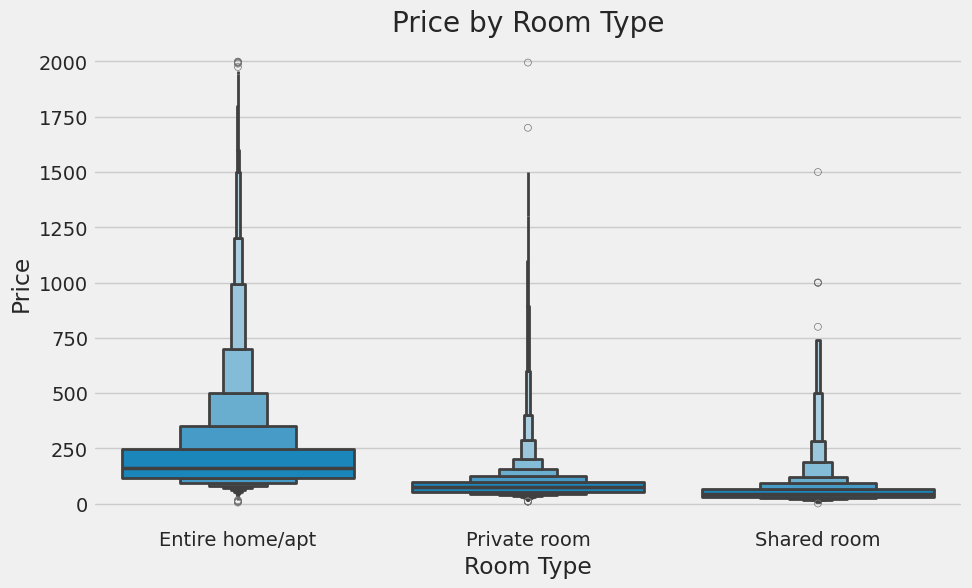

In [73]:
#2. How does price vary by room type
# df["room_type"] # This line just prints the column, no plot is generated here.

plt.figure(figsize=(10, 6))
# Use boxplot to show the distribution of 'price' for each 'room_type'
sns.boxenplot(x='room_type', y='price', data=df)
plt.title("Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

The data demonstrates the expected pricing hierarchy where guests pay premiums for increased privacy and space. Entire homes offer the most privacy but at the highest cost, while shared accommodations provide the most economical option. The significant price spread in entire home listings suggests this market includes everything from basic apartments to luxury properties, while private and shared rooms represent more standardized accommodation types with more predictable pricing.

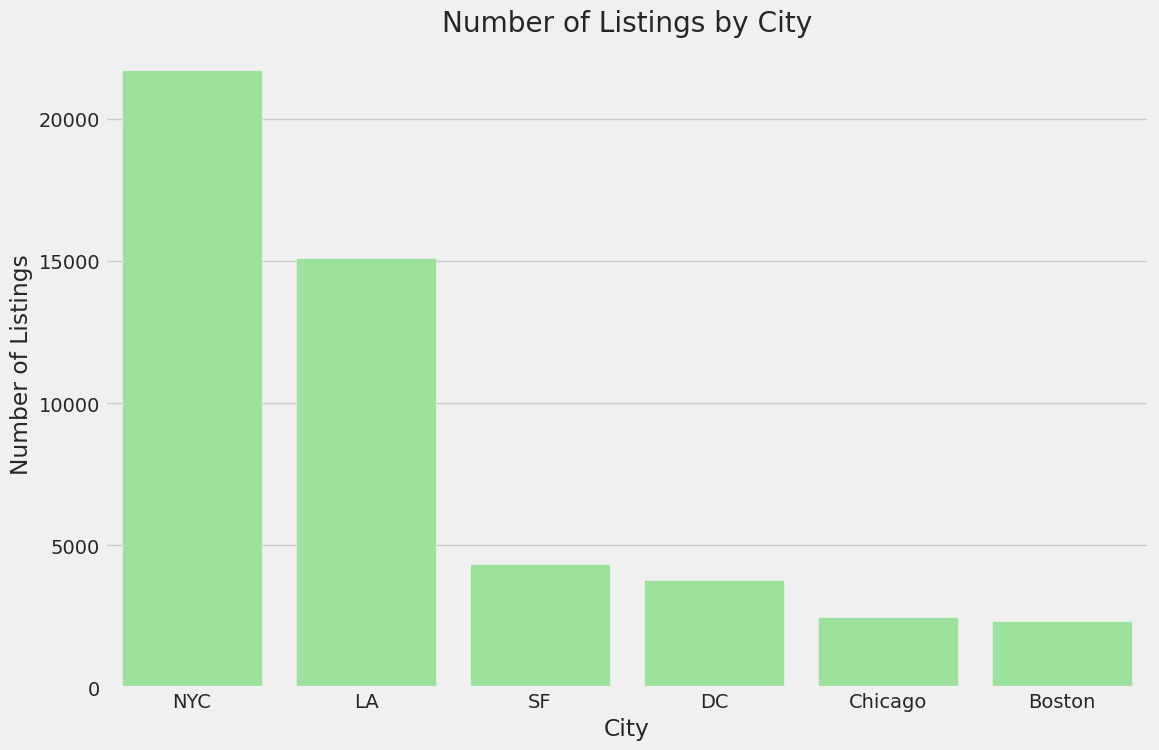

In [80]:
#Which neighbourhood have the most listings
plt.figure(figsize=(12, 8))
sns.countplot(x='city', data=df, color="lightgreen", order=df['city'].value_counts().index)
plt.title("Number of Listings by City")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.show()

We can see NYC, LA and SF has highest property listing

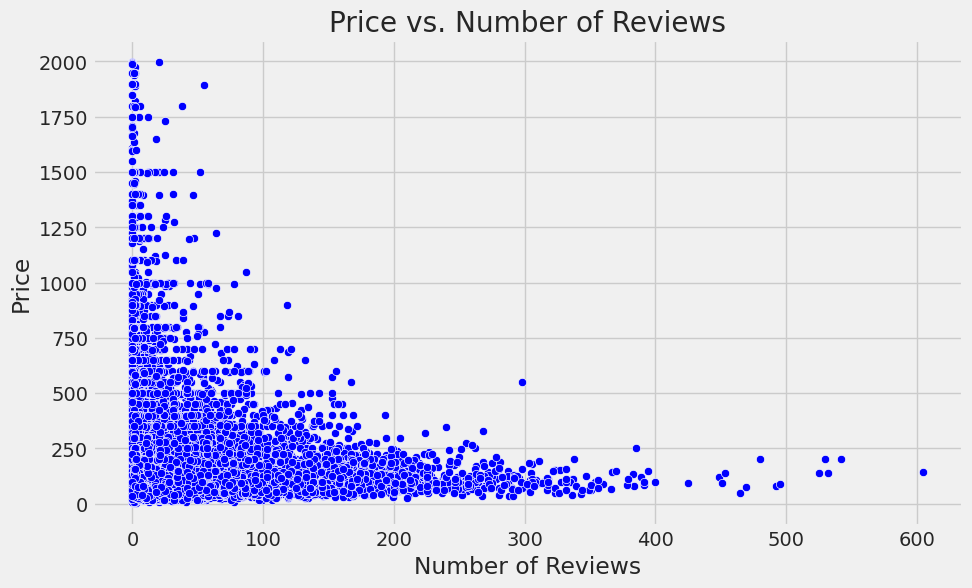

In [83]:
#Relation between price and number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, color='blue')
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

This pattern likely reflects booking behavior where budget-conscious travelers book affordable options more frequently, while luxury properties serve fewer guests who may be less likely to leave reviews. The data also suggests that lower-priced listings may achieve better visibility and booking momentum through their review volume.

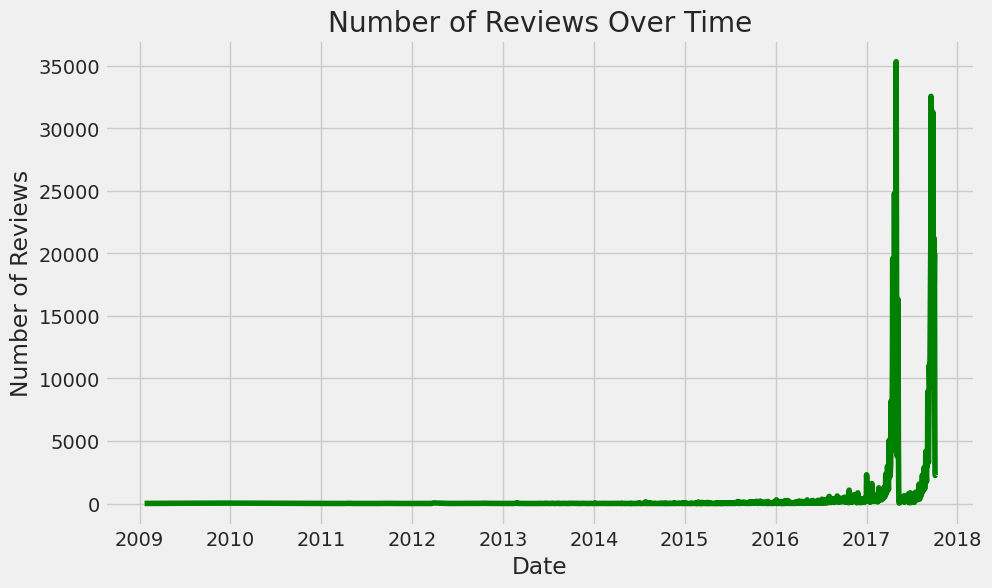

In [85]:
#how number of reviews have changed over time
df["last_review"]= pd.to_datetime(df["last_review"])
review_over_time= df.groupby(df["last_review"].dt.date)["number_of_reviews"].sum()

plt.figure(figsize=(10, 6))
review_over_time.plot(kind='line', color='green')
plt.title("Number of Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()

The growth pattern reflects typical startup scaling, where early years involve slow user acquisition followed by rapid viral growth once the platform reaches critical mass. The sharp increase likely coincides with increased consumer comfort with sharing economy platforms, expanded international presence, and word-of-mouth marketing effects.
